# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:The smart cab doesn't move at all during the simulation. When the light changes to red, it gets positive rewards for being stopped at red light. Agent gets negative rewards for not moving when the ligh turns green**

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:
In the agent.py, the following three lags can be set:
1. learning   - set to True to force the driving agent to use Q-learning.

2. epsilon - continuous value for the exploration factor, default is 1. We can set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm. When we decay epsilon, the model starts taking lesser and lesser random actions after each trial and it slowly transitions from exploration to exploitation. The agent will be tested on what it has learned after epsilon has passed a certain threshold (the default threshold is 0.05)

3. alpha   - continuous value for the learning rate, default is 0.5. We can set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.


    -  In the environment.py Python file, act() class function is called when an agent performs an action.

    - In the simulator.py Python file, 'render_text()' function is the non-GUI render display of the simulation. Simulated trial data will be rendered in the terminal/ command prompt. The 'render()' function is the GUI render display of the simulation.
    
    - In the planner.py Python file, will the 'next_waypoint() function considers the East-West direction first
**

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


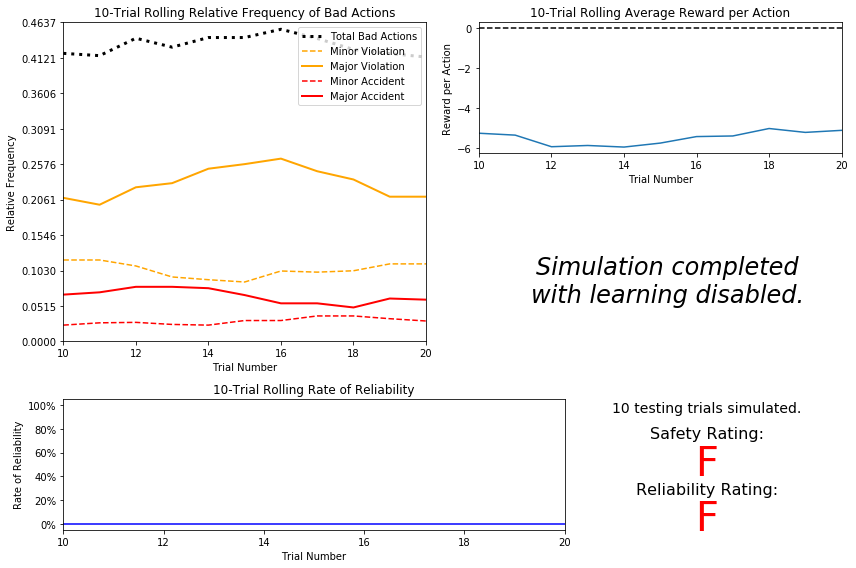

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:
- The driving agent is making bad decisions at a relative frequency of 0.45 (45% of time). These bad decisions are causing major accidents at a relative frequency of 0.08 and minor accidents at a relative frequency of 0.04.

- The rate of reliability is very low at 4% and this is understandable because agent is taking random actions.

- The agent is getting negative reward ranging from -6 to -5 per action. Yes, the rewards suggest that it has been penalized heavily. It has not got any positive rewards which signifies that he has not made any right move.

- As the number of trials increases the outcome of results does not change significantly as relative frequency of Total Bad Actions, Minor Violation, Major Violation, Minor Accident, Major Accident remains in the same range even with the increase in number of trials. Rate of reliability remains constant, and it continues getting negative rewards even with the increase in number of trials.

- This Smartcab is not smart at all and is totally unsafe and unreliable for its passengers, because of extremely low reliability of 4%, and having accidents at a relative frequency of 0.08 for major ones and 0.04 for minor ones. No one wants to risk their life by going in such a car. **

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer: I think the sensor data "inputs" which includes "light" and "oncoming" are the most important for learning both safety and efficiency. I took into account the following for safety and efficiency consideration.

- light: Agents, and other cars' decision to make a move or stop will depend on the light.

- left, right: If suppose agent is not careful about the intended direction of travel for a vehicle to the smartcab's left then it can prove to be dangerous in case when agent wants to turn right and the vehicle from agent's left is coming straight through. It can cause collision. Vehicles to the right do not create much problem because if they are in the intersection that would mean that our agent's light is red and he should not move forward or left anyways. Hence, it is important to have 'left' as part of the state. But, we can safely ignore 'right'.

- Oncoming traffic : Its monitoring is very important to avoid any collission. On a green light, a left turn is permitted if there is no oncoming traffic making a right turn or coming straight through the intersection. On a red light, a right turn is permitted if no oncoming traffic is approaching from agent's left through the intersection. 

In absence of any of these safety will be compromised and agent will not be able to figure how to reach the destination safely. If safety is put at risk, it can't be efficient as well as agent will not be in a position to reach destination

- 'waypoint' is very important for smarcab to reach its destination efficiently and is important to assess right direction to make a move.


** I did not choose 'deadline' because it is not important for safety. In fact 'deadline' can put the agent at risk as it may take some risky decisions just to reach in time. However, it contributes towards efficiency. But, penalty is severe for having accidents. Reaching in time helps in getting good grade, but I do not want to risk safety at all. Also including deadline will drastically increase the dimension of the state space which would make it difficult to handle.


Hence, I would consider 'waypoint', inputs['light'], inputs['oncoming'], and inputs['left'] as features for agent's state**

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer: The state would be defined using four features 'light', 'oncoming traffic', and 'waypoint'. 'Light' can take two possible values here i.e., red and green. 'Oncoming traffic' can take four different values (none, forward, left,and right). Waypoint can take three different values (forward, left, and right), and 'left' can take four different values  (none, forward, left,and right. 

Hence, number of possible states based on the features selected can be 2(light)X4(oncoming traffic)X3(waypoint)X4(left)=96. I feel this is manageable to learn a policy for each state and can be done in reasonable number of trials.

**

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

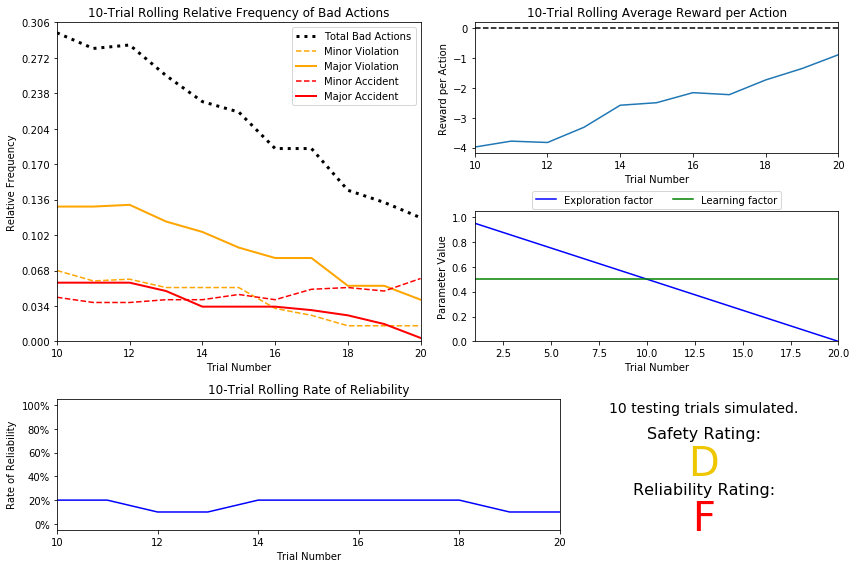

In [2]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:- 
- The basic similarity in both basic driving agent and the default Q-Learning agent is that they both are not up to the mark. The safety ranking of default Q-Learning agent is better as it is "D" as compared to "F" previously. Reliability rating remain unchanged to "F".

- The driving agent's relative frequency of making bad decisions has come down from 0.30(trial 10) to 0.13 (trial number20). These bad decisions are causing major accidents at a relative frequency of 0.05(max) and minor accidents at a relative frequency of 0.07(max). These numbers are relatively lesser than basic driving agent's.

- The rate of reliability is low at 20% as against 4% of basic driving agent's.

- The agent's reward per action range from -4 (trial 10) to -1(trial20). Yes, the rewards suggest that it has been penalized heavily. 

-  ** Agent had 20 training trials before testing**. Yes, this makes sense as the epsilon initial value is 1 and it is decaying with every trial as per the equation epsilon = epsilon-0.05. The epsilon tolerance before beginning testing, default is 0.05. The total number of training trials work out to be ((1-0.05)/0.05)+1=20

- The decaying function for exploration factor is accurately represented in parameters panel as it is decreasing linearly from value of 1 to 0.05 in the decrements of 0.05 with every trial.

- As the number of trials increases the outcome of results does change as relative frequency of Total Bad Actions comes down from 0.30(trial 10) to 0.13 (trial number20); relative frequency of Minor Violation, Major Violation, and  Major Accident also comes down. Relative frequency of minor accidents increases little bit though. Rate of reliability almost remains unchanged. The reward per action remains negative, however their are becoming lesser -ve with increase in number of trials. Hence the average reward increases with the number of trials.

- This Smartcab is not smart at all and is totally unsafe and unreliable for its passengers, because of low safety rating of "D"(Agent causes at least one minor accident, such as turning left on green with oncoming traffic) and extremely low reliability rating of "F"(Agent fails to reach the destination on time for at least 60% of trips). However, the safety rating of this driving agent is relatively higher than basic driving agent which was "F".
- 
.**

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

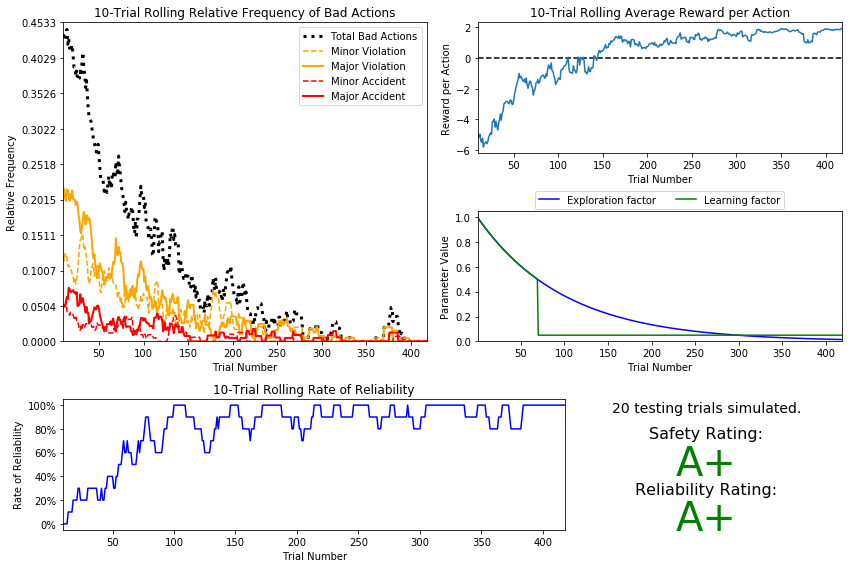

In [2]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:
- **I used  ϵ=a^t,for a=0.99 as decaying function epsilon**.

- Approximately 415 training trials were needed by my agent before begining testing.

- I used epsilon tolerance= 0.015. I used a very low value of epsilon tolerance as against default of 0.05 because it helped in increasing the number of training trials. In order to increase the number of trainging trials I also took the constant in decaying function, a=0.99 to increase the number of training trials. Higher this'a'(should be between 0 and 1), higher the number of training trials. Increase in number of training trials helped in better learning.

I chose alpha as a decaying function same as epsilon decaying function till trial 70. After trial number 70 I kept alpha as constant at 0.05. At trial 70 alpha reduced to 0.5 from initial value of 0.99 at trial1.

Beginning with a higher learning rate attributed more weight to new results, and steadily lowering it to a relatively small number ensured that the learned values are given more weightage with reducing alpha.  Low alpha (after 70 trials) means that the agent needs more trials to converge to an optimal policy. I had sufficient number of trials and can see that after 380 trials rate of reliability is consistently near 100%.

- **There was tremendous improvement made with this Q-learner when compared to the default Q-learner**. Safety rating improved from D to A+. Reliability rating improved from F to A+. With the increase in number of trials the relative frequency of total bad actions, minor violation, major violation, minor accident, major accident reduced to almost zero.
A+ safety rating indicates that in testing trials agent commits no traffic violations, and always chooses the correct action. A+ reliability rating indicates agent reaches the destination in time for 100% of trips. Reward per action increased to positive 2 as against negative rewards in previous cases.

- Yes, Q-Learner results show that the driving agent successfully learned an appropriate policy as all the results are showing positive improvement with increase in number of learning trials and testing results give A+ in both safety and reliability.

- Yes, I am satisfied with the safety and reliability ratings of the Smartcab.





### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

<img src = "img/policy_.png", width=800, height = 800>

**Answer:
The optimal policy (Sate action pair) based on US right of way traffic laws for smartcab is depicted in tabular format above.** For a particular state 'NO' is mentioned if it is not allowed to follow the waypoint and 'OK' is mentioned if it is allowed to follow the waypoint.

**Note: In case you are not able to see it in Jupyter notebook, then please refer 'policy.png' file im img folder enclosed. I have included a detailed description of policy in the following paragraph as well**.

The state is defined using four features 'light', 'oncoming traffic', and 'waypoint'.  Waypoint can take three different values (forward, left, and right). 'Light' can take two possible values here i.e., red and green. 'Oncoming traffic' can take four different values (none, forward, left,and right), and 'left(vehicles on agent's left)' can take four different values (none, forward, left,and right).

**On a green light**, a left turn is permitted if there is no oncoming traffic making a right turn or coming straight through the intersection. Agent can go forward, and make right turns on green light.
 
**On a red light**, a right turn is permitted when either no oncoming traffic is approaching from agent's left through the intersection or no oncoming traffic from opposite side is trying to turn left into the same lane where agent intends to turn right. Forward motion of agent is not allowed at red light, and he can not take a left turn on red light either.

Following these conditions agent has to follow the "waypoint" and reach destination in time.

I have included the policy (action with the highest value for a particular state) for each state in the table above for easy reference.

Actually, some of the possible combination of states are either not possible or possible only when the other vehicle is running a red light. In our computer simulated model vehicle's other than agent are not running red lights, so such cases are not possible. There are twelve such states where agent's light is green, but, 'left' is forward. Cross traffic should be having red light that time and hence the 'left' can not move forward legally. Similar are the other 12states where agent has green light and vehicles on agent left are trying to go left.

There are four case where agent has red light, oncoming traffic is forward or left, and 'left vehicles' are going forward or left. None of these case is possible as when it is green light for either of the side then for cross traffic is red light.
I have marked such states as not possible in the table.

Also,there are four cases when agent has green light (waypoint is forward or right) and oncoming traffic is trying to turn left. Here agent will have right of way and is allowed to go right or forward in line of the waypoint.

Some of these type of cases are discussed below:

### The smartcab followed optimal policy for the following: 

**('forward', 'red', None, None)**
 -- forward : -12.25
 -- right : 0.52
 -- None : 1.86
 -- left : -11.27**
It is not allowed to go forward on red (got -12.25), and 'none'(1.86) is the best action here as it should wait for light to turn green to move forward. I also notice that in majority of cases penalty of wrong action is very high as the magnitude of negative values are much higher than positive value.

**('right', 'green', 'forward', 'right')**
 -- forward : 0.00
 -- right : 0.40
 -- None : 0.00
 -- left : 0.00
 IT followed the policy as agent can go right on green light. Right action has highest of 0.4
 
** ('left', 'red', 'left', 'forward')**
 -- forward : -26.63
 -- right : 0.00
 -- None : 1.66
 -- left : -39.69
 It followed the policy here as the agent is not allowed to turn left on red. Left actioin is -39.69, and none is the best choice +1.66. It is waiting for light to turn green to make move as per waypoint.
 
** ('forward', 'green', 'left', None)**
 -- forward : 1.80
 -- right : 0.66
 -- None : -5.20
 -- left : 0.08
 
 Here when agent has green light, agent has** right of way** to move forward, oncoming should wait to turn left if they have green too. The same is captured rightly here as forward is +1.8, so agent can go forward.
 
** ('left', 'green', 'left', 'left')**
 -- forward : 0.00
 -- right : 0.00
 -- None : -0.26
 -- left : 1.70
 Here agent wants to move left and light is green, so it's left action is correctly given a highest value of +1.70. It is** not possible** for vehicles to the left of agent to make a left turn as that would mean they are jumping red light. Agent must have not encounter any such condition where vehicle to left is jumping red light. Hence, it chose to move left as per waypoint.



### The smartcab did not follow the optimal policy for this state:
**('left', 'green', 'left', 'right')
 -- forward : 0.00
 -- right : 1.03
 -- None : -0.27
 -- left : 0.00**
Here the agent should be allowed to turn left as per waypoint,  as the light is green and oncoming traffic is turning left too. But, here the Qvalue is higher for right turn(1.03) as compared to left(0.0) This will cause unnecessary delay as the agent is not following waypoint. May be some more trials could have fixed this.


### The recorded Q- table is as follows:

** State-action rewards from Q-Learning in the order of (waypoint, light, oncoming, left)**

**/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------**


- **waypoint, inputs['light'], inputs['oncoming'], inputs['left'])**


('left', 'green', 'forward', 'left')
 -- forward : 0.64
 -- right : 0.53
 -- None : -0.22
 -- left : -14.49

('right', 'green', 'forward', 'right')
 -- forward : 0.00
 -- right : 0.40
 -- None : 0.00
 -- left : 0.00
 IT followed the policy as agent can go right on green light. Right has highest of 0.4

('left', 'red', 'right', 'left')
 -- forward : -0.54
 -- right : 0.37
 -- None : 0.00
 -- left : 0.00

('right', 'red', 'right', None)
 -- forward : -10.41
 -- right : 1.19
 -- None : 0.91
 -- left : -38.15

('right', 'green', 'right', 'forward')
 -- forward : 0.87
 -- right : 0.00
 -- None : -4.85
 -- left : -14.61

('left', 'red', 'right', 'right')
 -- forward : 0.00
 -- right : 0.70
 -- None : 0.00
 -- left : 0.00

('right', 'green', None, 'left')
 -- forward : -0.19
 -- right : 1.92
 -- None : -4.31
 -- left : 0.85

('left', 'green', 'right', 'right')
 -- forward : 0.00
 -- right : 0.79
 -- None : 0.00
 -- left : 0.00

('forward', 'red', None, None)
 -- forward : -12.25
 -- right : 0.52
 -- None : 1.86
 -- left : -11.27
 It is not allowed to go forward on red (got -12.25), and 'none'(1.86) is the best action here as it should wait for light to turn green to move forward. I also notice that in majority of cases penalty of wrong action is very high as the magnitude of negative values are much higher than positive value.

('right', 'green', 'left', 'right')
 -- forward : 0.86
 -- right : 0.00
 -- None : -5.29
 -- left : 0.00

('right', 'red', None, 'forward')
 -- forward : -38.59
 -- right : -19.41
 -- None : 0.54
 -- left : -40.73

('forward', 'red', 'left', None)
 -- forward : -10.31
 -- right : 0.31
 -- None : 1.91
 -- left : -9.82

('left', 'red', 'left', 'forward')
 -- forward : -26.63
 -- right : 0.00
 -- None : 1.66
 -- left : -39.69
 It followed the policy here as the agent is not allowed to turn left on red. Left actioin is -39.69, and none is the best choice +1.66. It is waiting for light to turn green to make move as per waypoint.

('right', 'red', 'right', 'left')
 -- forward : 0.00
 -- right : 1.57
 -- None : 0.00
 -- left : -20.24

('left', 'red', None, None)
 -- forward : -12.97
 -- right : 1.06
 -- None : 2.11
 -- left : -13.06

('forward', 'green', 'left', None)
 -- forward : 1.80
 -- right : 0.66
 -- None : -5.20
 -- left : 0.08
 
 Here when agent has green light, agent has right of way to move forward, oncoming should wait to turn left if they have green too. The same is captured rightly here as forward is +1.8, so agent can go forward.

('left', 'green', 'left', 'forward')
 -- forward : 0.00
 -- right : 0.96
 -- None : -5.73
 -- left : 0.11

('right', 'green', 'right', None)
 -- forward : 0.00
 -- right : 1.16
 -- None : -4.06
 -- left : -19.71

('right', 'red', 'left', 'forward')
 -- forward : -27.44
 -- right : -20.33
 -- None : 1.24
 -- left : 0.00

('left', 'green', None, 'right')
 -- forward : 0.02
 -- right : 0.83
 -- None : 0.00
 -- left : 1.82

('forward', 'red', 'right', 'left')
 -- forward : 0.00
 -- right : 0.97
 -- None : 0.00
 -- left : 0.00

('right', 'red', 'right', 'forward')
 -- forward : -30.50
 -- right : -19.32
 -- None : 0.06
 -- left : -3.93

('left', 'green', 'left', 'left')
 -- forward : 0.00
 -- right : 0.00
 -- None : -0.26
 -- left : 1.70
 Here agent wants to move left and light is green, so it left action is correctly given a highest value of +1.70. It is not possible for vehicles to the left of agent to make a left turn as that would mean they are jumping red light. Agent must have not encounter any such condition where vehicle to left is jumping red light. Hence, it chose to move left as per waypoint.

('forward', 'green', None, None)
 -- forward : 1.91
 -- right : 0.60
 -- None : -5.11
 -- left : 0.67

('right', 'green', 'forward', 'left')
 -- forward : 0.14
 -- right : 1.18
 -- None : -4.04
 -- left : -19.21

('left', 'red', 'left', None)
 -- forward : -10.25
 -- right : 0.33
 -- None : 2.01
 -- left : -18.49

('right', 'green', None, 'forward')
 -- forward : 0.85
 -- right : 1.89
 -- None : -5.41
 -- left : 0.87

('left', 'green', 'left', None)
 -- forward : 0.45
 -- right : 0.36
 -- None : -5.07
 -- left : 1.69

('left', 'red', 'forward', None)
 -- forward : -11.72
 -- right : 0.28
 -- None : 1.81
 -- left : -13.48

('left', 'green', 'right', 'left')
 -- forward : 0.09
 -- right : 0.35
 -- None : -3.34
 -- left : 0.00

('left', 'red', None, 'right')
 -- forward : -8.45
 -- right : 0.49
 -- None : 1.83
 -- left : -9.98

('forward', 'green', 'right', 'forward')
 -- forward : 2.09
 -- right : 1.12
 -- None : -4.32
 -- left : -19.59

('right', 'green', 'left', 'left')
 -- forward : 1.13
 -- right : 0.00
 -- None : 0.00
 -- left : 1.20

('left', 'red', 'left', 'left')
 -- forward : -8.63
 -- right : 0.86
 -- None : 1.82
 -- left : -9.30

('right', 'red', 'left', 'right')
 -- forward : 0.00
 -- right : 0.06
 -- None : 1.08
 -- left : -8.27

('forward', 'red', 'forward', 'forward')
 -- forward : 0.00
 -- right : -16.68
 -- None : 0.94
 -- left : -33.22

('left', 'red', 'forward', 'right')
 -- forward : -8.56
 -- right : 1.13
 -- None : 0.12
 -- left : 0.00

('left', 'green', 'forward', 'right')
 -- forward : 0.14
 -- right : -0.03
 -- None : -0.50
 -- left : -11.85

('forward', 'red', 'forward', 'left')
 -- forward : -6.35
 -- right : 0.09
 -- None : 1.56
 -- left : -5.68

('forward', 'green', 'forward', 'right')
 -- forward : 0.00
 -- right : 0.91
 -- None : -0.24
 -- left : -1.96

('forward', 'red', 'right', 'right')
 -- forward : -8.26
 -- right : 0.00
 -- None : 0.31
 -- left : 0.00

('right', 'red', None, 'right')
 -- forward : -9.91
 -- right : 1.58
 -- None : 0.43
 -- left : 0.00

('left', 'green', 'forward', None)
 -- forward : 0.69
 -- right : 0.79
 -- None : -4.40
 -- left : -19.52

('forward', 'red', 'right', 'forward')
 -- forward : -3.92
 -- right : -1.04
 -- None : 0.58
 -- left : 0.00

('forward', 'green', 'right', None)
 -- forward : 2.02
 -- right : 0.70
 -- None : -5.40
 -- left : 0.00

('forward', 'red', 'right', None)
 -- forward : -1.00
 -- right : 0.00
 -- None : 1.83
 -- left : -3.90

('right', 'green', None, None)
 -- forward : 0.91
 -- right : 1.87
 -- None : -4.85
 -- left : 0.84

('forward', 'red', 'forward', None)
 -- forward : -12.12
 -- right : 0.56
 -- None : 1.92
 -- left : -10.31

('forward', 'red', None, 'left')
 -- forward : -9.18
 -- right : 0.63
 -- None : 1.86
 -- left : -18.83

('forward', 'green', 'forward', 'forward')
 -- forward : 0.00
 -- right : 0.64
 -- None : -5.14
 -- left : -16.86

('right', 'red', None, 'left')
 -- forward : -11.60
 -- right : 1.57
 -- None : 1.22
 -- left : -9.43

('forward', 'green', 'left', 'right')
 -- forward : 0.06
 -- right : 1.26
 -- None : 0.00
 -- left : 0.00

('right', 'green', 'forward', 'forward')
 -- forward : 1.32
 -- right : 1.76
 -- None : -2.50
 -- left : -1.92

('forward', 'red', 'forward', 'right')
 -- forward : -5.74
 -- right : 0.51
 -- None : 0.00
 -- left : -0.96

('right', 'green', None, 'right')
 -- forward : 0.70
 -- right : 0.05
 -- None : -4.85
 -- left : 0.28

('forward', 'red', 'left', 'right')
 -- forward : -8.08
 -- right : 0.00
 -- None : 1.45
 -- left : -9.77

('forward', 'red', None, 'forward')
 -- forward : -39.10
 -- right : -19.41
 -- None : 1.86
 -- left : -39.73

('forward', 'green', 'left', 'left')
 -- forward : 2.00
 -- right : 1.24
 -- None : -4.14
 -- left : 0.48

('right', 'green', 'right', 'left')
 -- forward : 0.00
 -- right : 1.33
 -- None : 0.00
 -- left : 0.00

('left', 'red', None, 'forward')
 -- forward : -33.49
 -- right : -20.42
 -- None : 1.68
 -- left : -35.92

('forward', 'red', None, 'right')
 -- forward : -7.51
 -- right : 1.15
 -- None : 1.75
 -- left : -8.89

('left', 'green', 'right', 'forward')
 -- forward : 0.02
 -- right : 0.99
 -- None : -0.26
 -- left : 0.00

('right', 'red', None, None)
 -- forward : -18.24
 -- right : 1.95
 -- None : 0.44
 -- left : -10.00

('left', 'red', None, 'left')
 -- forward : -10.62
 -- right : 1.20
 -- None : 1.72
 -- left : -9.48

('forward', 'red', 'left', 'forward')
 -- forward : -5.79
 -- right : -13.60
 -- None : 1.81
 -- left : -38.01

('forward', 'green', 'forward', None)
 -- forward : 1.85
 -- right : 0.56
 -- None : -5.35
 -- left : -20.50

('forward', 'green', 'left', 'forward')
 -- forward : 2.01
 -- right : 1.03
 -- None : -5.02
 -- left : 0.34

('right', 'red', 'forward', 'forward')
 -- forward : -36.00
 -- right : 0.00
 -- None : 1.16
 -- left : 0.00

('right', 'red', 'left', None)
 -- forward : -10.09
 -- right : 1.82
 -- None : 0.93
 -- left : -10.50

('right', 'green', 'forward', None)
 -- forward : -0.63
 -- right : 1.92
 -- None : -4.42
 -- left : -17.53

('forward', 'green', None, 'forward')
 -- forward : 1.81
 -- right : 0.26
 -- None : -5.02
 -- left : 1.03

('right', 'red', 'forward', 'left')
 -- forward : -31.99
 -- right : 2.26
 -- None : 1.55
 -- left : -9.79

('forward', 'green', None, 'right')
 -- forward : 1.92
 -- right : 0.83
 -- None : -0.30
 -- left : 0.50

('forward', 'green', 'forward', 'left')
 -- forward : 0.00
 -- right : 1.12
 -- None : -4.37
 -- left : 0.00

('right', 'green', 'left', 'forward')
 -- forward : 0.12
 -- right : 1.96
 -- None : -5.16
 -- left : 0.04

('left', 'red', 'forward', 'left')
 -- forward : -16.56
 -- right : 0.55
 -- None : 1.66
 -- left : -8.59

('left', 'green', None, 'forward')
 -- forward : 0.53
 -- right : 0.64
 -- None : -4.91
 -- left : 1.84

('forward', 'red', 'left', 'left')
 -- forward : -8.96
 -- right : 0.40
 -- None : 1.92
 -- left : -13.98

('left', 'red', 'right', 'forward')
 -- forward : -31.03
 -- right : -14.38
 -- None : 1.63
 -- left : 0.00
('left', 'green', 'left', 'right')
 -- forward : 0.00
 -- right : 1.03
 -- None : -0.27
 -- left : 0.00
Here the agent should be allowed to turn left as per waypoint,  as the light is green and oncoming traffic is turning left too. But, here the Qvalue is higher for right turn(1.03) as compared to left(0.0) This will cause unnecessary delay as the agent is not following waypoint. May be some more trials could have fixed this.


('right', 'red', 'left', 'left')
 -- forward : -10.29
 -- right : 0.00
 -- None : 0.63
 -- left : -9.33

('left', 'red', 'left', 'right')
 -- forward : -7.99
 -- right : 0.92
 -- None : 1.58
 -- left : -9.57

('forward', 'green', 'right', 'right')
 -- forward : 1.06
 -- right : 0.00
 -- None : 0.00
 -- left : 0.00

('left', 'red', 'forward', 'forward')
 -- forward : -39.89
 -- right : -19.95
 -- None : 2.01
 -- left : -39.22

('right', 'red', 'forward', None)
 -- forward : -11.38
 -- right : 1.82
 -- None : 1.01
 -- left : -10.58

('forward', 'green', None, 'left')
 -- forward : 2.04
 -- right : 0.37
 -- None : -4.51
 -- left : 0.17

('left', 'green', 'right', None)
 -- forward : 0.73
 -- right : -0.14
 -- None : -4.93
 -- left : -19.69

('left', 'green', None, None)
 -- forward : 1.03
 -- right : 0.72
 -- None : -5.18
 -- left : 1.92

('right', 'green', 'right', 'right')
 -- forward : 0.00
 -- right : 1.10
 -- None : 0.00
 -- left : 0.00

('forward', 'green', 'right', 'left')
 -- forward : 0.00
 -- right : 0.70
 -- None : -2.50
 -- left : -11.45

('right', 'red', 'forward', 'right')
 -- forward : -0.51
 -- right : 1.93
 -- None : -0.23
 -- left : -6.80

('left', 'green', 'forward', 'forward')
 -- forward : 1.02
 -- right : 0.64
 -- None : -4.71
 -- left : -0.97

('left', 'green', None, 'left')
 -- forward : 0.50
 -- right : 0.75
 -- None : -4.50
 -- left : 1.84

('right', 'green', 'left', None)
 -- forward : 0.95
 -- right : 1.81
 -- None : -4.61
 -- left : 0.47

('left', 'red', 'right', None)
 -- forward : -8.04
 -- right : 0.85
 -- None : 1.64
 -- left : -39.28

('right', 'red', 'right', 'right')
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.45
 -- left : 0.00


** 

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:
- If the future rewards are considered than agent may take wrong decisions. Agent's immediate safety is much more important as it doesn't have infinite life (in real life a a human will be in the car). This becomes a limitation for agent. Also, agent is not able to see beyond the current intersection. Its decisions are not based on previous or future positions as the state on the future positions are subject to change. He may only know the waypoint at future locations, but he doesn't have complete information about traffic lights, the number of other vehicles and their intent of motion on future intersections. **At each intersection decision is made independently so the future rewards do not make sense in this case**. 


- **The environment is always changing as the destination changes with every trial and hence future reward won't work in this case.**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.